<h1>Heart Attack prediction</h1> 
Simple analysis which should help to find three most promising attributes for predicting possible diameter narrowing. 

<h2>Description of columns</h2>

> 1. **age** - age in years
2. **sex** - sex (1 = male; 0 = female)
3. **cp** - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
4. **trestbps** - resting blood pressure (in mm Hg on admission to the hospital)
5. **chol** - serum cholestoral in mg/dl
6. **fbs** - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
7. **restecg** - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
8. **thalach** - maximum heart rate achieved
9. **exng** - exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** - ST depression induced by exercise relative to rest
11. **slp** - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
12. **caa** - number of major vessels (0-3) colored by flourosopy
13. **thall** - 2 = normal; 1 = fixed defect; 3 = reversable defect
14. **output** - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < 50% diameter narrowing; Value 1 = > 50% diameter narrowing)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline


import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import csv as csv

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# read the csv file 
df = pd.read_csv('/Users/SoumyaKrishnamurthy/Documents/Machine Learning/heart.csv')

In [2]:
# get info about data: column names and number of rows
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

In [3]:
df.head(5)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [4]:
#Categorical data
cat_cols=["sex","output",'cp',"fbs","exng","restecg","thall","caa","slp"]
cat_data=df[cat_cols]

#Continuous data
cont_cols=["age","trtbps","chol","thalachh","oldpeak"]
cont_data=df[cont_cols]

In [5]:
# Separate the data based on sex variable
men=df[df["sex"]==1].reset_index()  
women=df[df["sex"]==0].reset_index()   

# Separate the data based on risk variable
HighRisk=df[df["output"]==1].reset_index()  
LowRisk=df[df["output"]==0].reset_index()  

In [6]:
fig=go.Figure()
fig.add_trace(go.Box(y=men["age"],name="Male",marker_color="blue",boxpoints="all",whiskerwidth=0.3))
fig.add_trace(go.Box(y=women["age"],name="Female",marker_color="#e75480",boxpoints="all",whiskerwidth=0.3))
fig.update_layout(template="seaborn",title="Sample Distribution by Age and Gender",height=600)
fig.show()

Female Value Counts: 
1    72
0    24
Name: output, dtype: int64
Male Value Counts: 
0    114
1     93
Name: output, dtype: int64


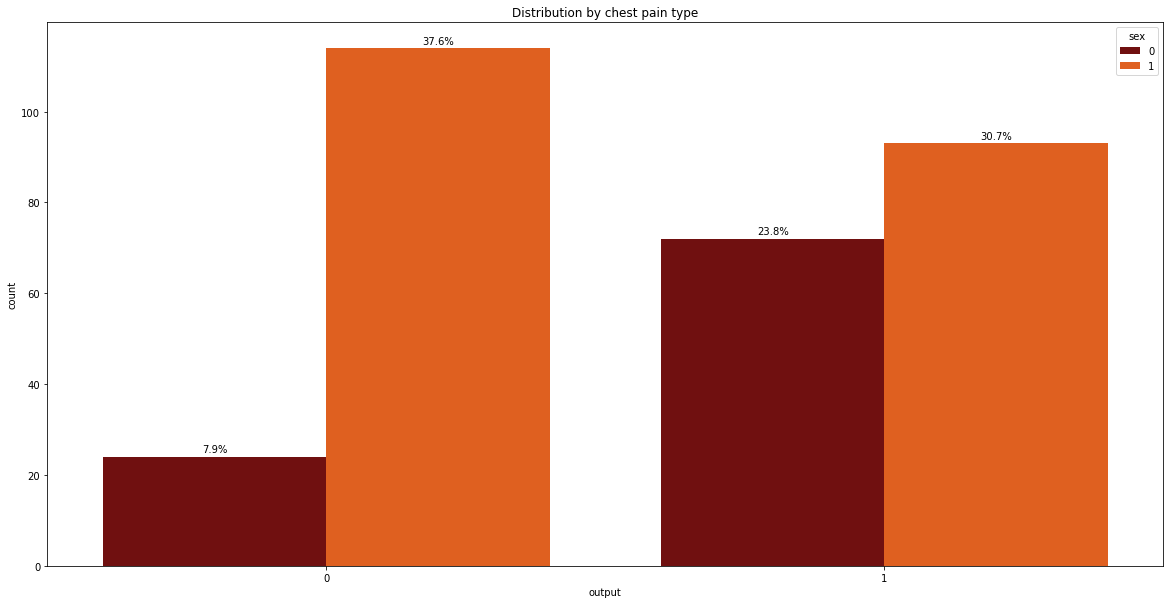

In [7]:
print("Female Value Counts: \n{}".format(women['output'].value_counts()))
print("Male Value Counts: \n{}".format(men['output'].value_counts()))

# function to display percentages on the bars
total = float(len(df))
def show_perc(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.1f}%'.format((height/total)*100),
            ha="center")
        
# plot data
fig = plt.figure(figsize=(20,10))

# Distribution by risk
ax = fig.add_subplot(1,1,1)
g = sns.countplot("output", data=df, palette='gist_heat',hue='sex')
g.set_title("Distribution by chest pain type")
show_perc(ax)

# View data distribution by gender and output
ax= px.sunburst(df,path= ["sex","output"],template= "seaborn", title= " Risk by Gender")
ax.show()

In [8]:
# print info
print("Number male of patients = {}" .format(len(men)))
print("Percent of men at high risk of heart attack = {} %" .format(round((len(men[men["output"]==1])/len(men)*100),2)))
print("Average high-risk age for men = {} yrs\n" .format(round(men[men["output"]==1]["age"].mean())))

print("Number of female patients = {}" .format(len(women)))
print("Percent of  women at high risk of heart attack = {} %" .format(round((len(women[women["output"]==1])/len(women)*100),2)))
print("Average high-risk age for women = {} yrs" .format(round(women[women["output"]==1]["age"].mean())))

Number male of patients = 207
Percent of men at high risk of heart attack = 44.93 %
Average high-risk age for men = 51 yrs

Number of female patients = 96
Percent of  women at high risk of heart attack = 75.0 %
Average high-risk age for women = 55 yrs


In [9]:
print("\n----------------Risk based on age------------------")
print("\nHigh risk")
print("Mean: {}".format(round(HighRisk["age"].mean())))
print("Median: {}".format(round(HighRisk["age"].median())))
print("Variance: {}".format(round(HighRisk["age"].var())))
print("Standard Deviation: {}\n\n".format(round((HighRisk["age"].std()),3)))

print("Low risk")
print("Mean: {}".format(round(LowRisk["age"].mean())))
print("Median: {}".format(round(LowRisk["age"].median())))
print("Variance: {}".format(round(LowRisk["age"].var())))
print("Standard Deviation: {}".format(round((LowRisk["age"].std()),3)))


----------------Risk based on age------------------

High risk
Mean: 52
Median: 52
Variance: 91
Standard Deviation: 9.551


Low risk
Mean: 57
Median: 58
Variance: 63
Standard Deviation: 7.962


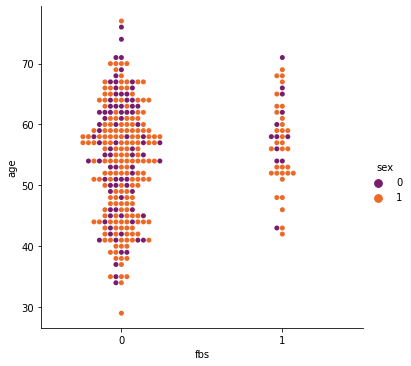

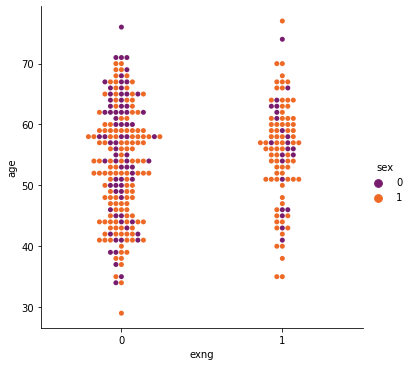

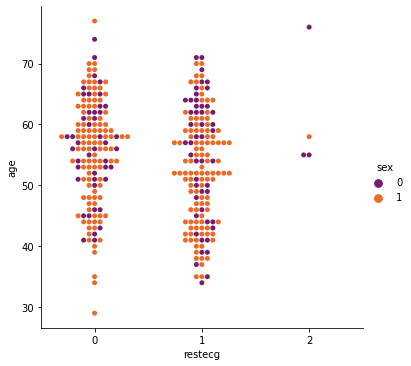

In [10]:
# distribution of sample 
cols=["output",'cp',"fbs","exng","restecg"]

#Swarm Plots
for col in cols[2:]:
    sns.catplot(kind="swarm", data=df, x=col, y="age", palette="inferno", hue="sex")
plt.show()

Text(0.5, 0.98, 'maximum heart rate achieved')

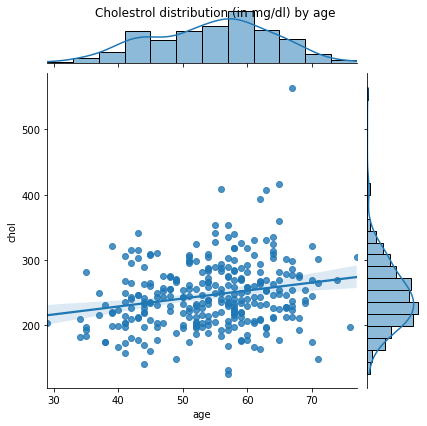

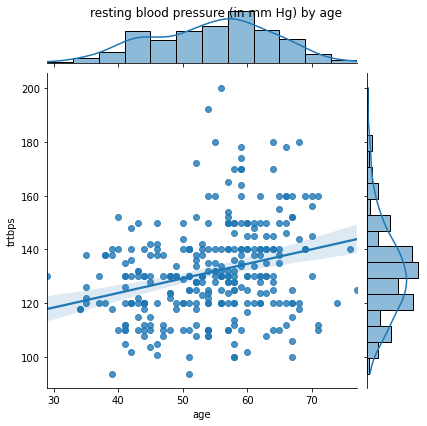

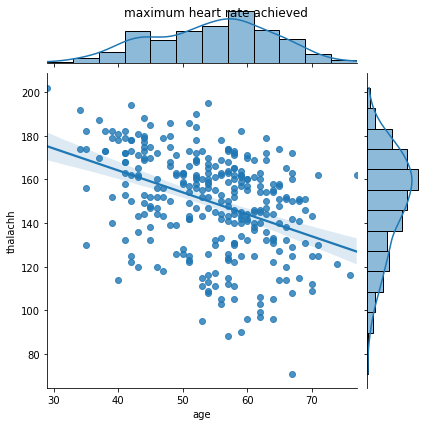

In [11]:
# use seaborn to plot the correlation between age and cholestrol
c = sns.jointplot(df['age'], df['chol'], df['sex'], kind='reg')
c.fig.suptitle("Cholestrol distribution (in mg/dl) by age")
tr = sns.jointplot(df['age'], df['trtbps'], kind='reg')
tr.fig.suptitle("resting blood pressure (in mm Hg) by age")
th = sns.jointplot(df['age'], df['thalachh'], kind='reg')
th.fig.suptitle("maximum heart rate achieved")

<h2> Looking at high risk patients only </h2>

In [12]:
# function to display percentages on the bars
total_hr = float(len(HighRisk))
def show_perc_hr(ax):
    for p in ax.patches:
        height = np.nan_to_num(p.get_height())
        ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.1f}%'.format((height/total_hr)*100),
            ha="center")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


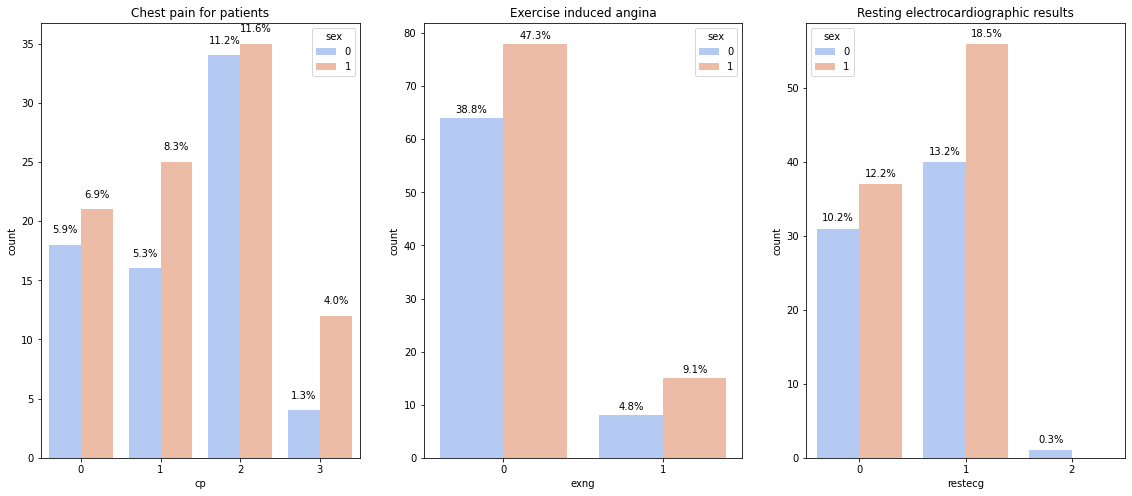

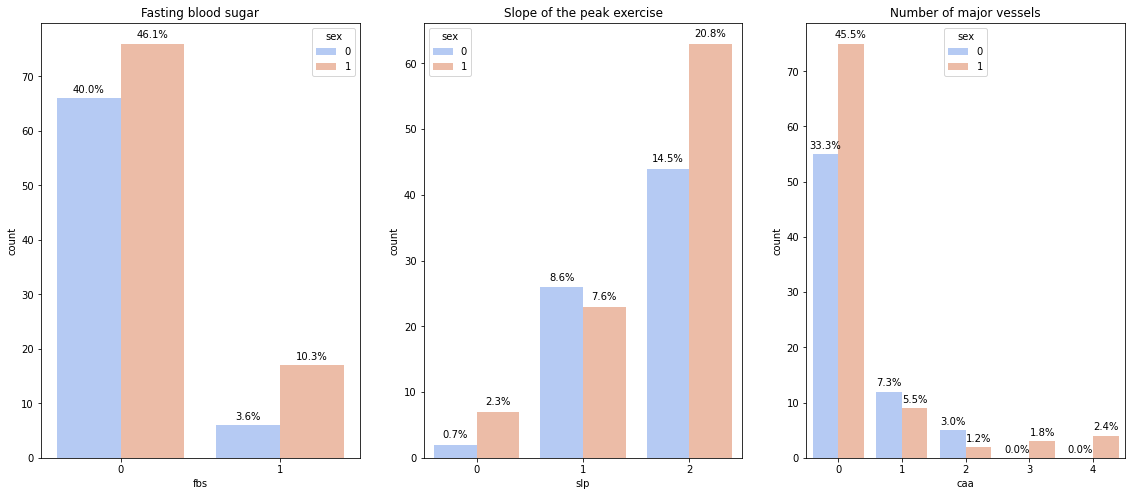

In [13]:
# plot data
fig1 = plt.figure(figsize=(40,8))

# chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
ax1 = fig1.add_subplot(1,6,1)
g =  sns.countplot('cp', data=HighRisk, palette="coolwarm", hue='sex')
g.set_title("Chest pain for patients")
show_perc(ax1)


# exercise induced angina (1 = yes; 0 = no)
ax2 = fig1.add_subplot(1,6,2)
g = sns.countplot('exng', data=HighRisk, palette="coolwarm", hue='sex')
g.set_title("Exercise induced angina")
show_perc_hr(ax2)

# resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
ax3 = fig1.add_subplot(1,6,3)
g = sns.countplot('restecg', data=HighRisk, palette="coolwarm", hue='sex')
g.set_title("Resting electrocardiographic results")
show_perc(ax3)

# plot all final results 
fig2 = plt.figure(figsize=(40,8))

# fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
ax4 = fig2.add_subplot(1,6,4)
g = sns.countplot('fbs', data=HighRisk, palette="coolwarm", hue='sex')
g.set_title("Fasting blood sugar")
show_perc_hr(ax4)

# the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
ax5 = fig2.add_subplot(1,6,5)
g = sns.countplot('slp', data=HighRisk, palette="coolwarm", hue='sex')
g.set_title("Slope of the peak exercise")
show_perc(ax5)

# number of major vessels (0-3) colored by flourosopy
ax6 = fig2.add_subplot(1,6,6)
g = sns.countplot('caa', data=HighRisk, palette="coolwarm", hue='sex')
g.set_title("Number of major vessels")
show_perc_hr(ax6)

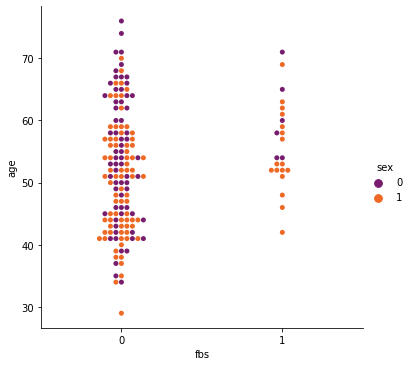

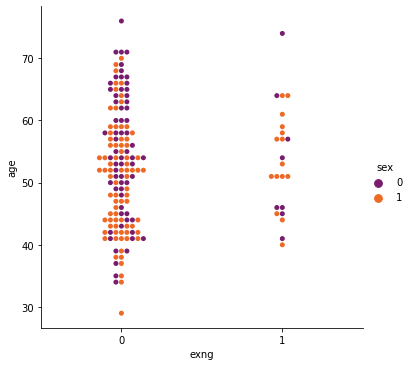

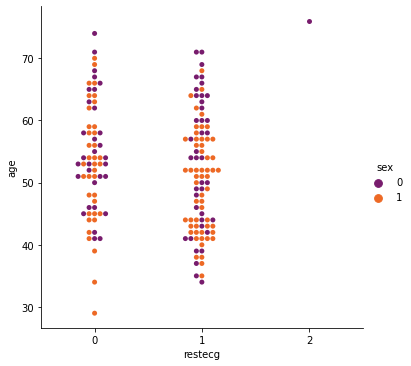

In [14]:
#Swarm Plots
for col in cols[2:]:
    sns.catplot(kind="swarm", data=HighRisk, x=col, y="age", palette="inferno", hue="sex")
plt.show()

In [15]:
# convert data in the original dataset from categorical to numerical (it is easier to analyse)
df_encoded = pd.get_dummies(df, columns=['sex','cp','fbs','restecg','exng', 'slp','caa','thall', 'output'], drop_first=True)
print(df_encoded.columns)
df_encoded.head(5)

Index(['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'sex_1', 'cp_1', 'cp_2',
       'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exng_1', 'slp_1', 'slp_2',
       'caa_1', 'caa_2', 'caa_3', 'caa_4', 'thall_1', 'thall_2', 'thall_3',
       'output_1'],
      dtype='object')


age  trtbps  chol  thalachh  oldpeak  sex_1  cp_1  cp_2  cp_3  fbs_1  ...  \
0   63     145   233       150      2.3      1     0     0     1      1  ...   
1   37     130   250       187      3.5      1     0     1     0      0  ...   
2   41     130   204       172      1.4      0     1     0     0      0  ...   
3   56     120   236       178      0.8      1     1     0     0      0  ...   
4   57     120   354       163      0.6      0     0     0     0      0  ...   

   slp_1  slp_2  caa_1  caa_2  caa_3  caa_4  thall_1  thall_2  thall_3  \
0      0      0      0      0      0      0        1        0        0   
1      0      0      0      0      0      0        0        1        0   
2      0      1      0      0      0      0        0        1        0   
3      0      1      0      0      0      0        0        1        0   
4      0      1      0      0      0      0        0        1        0   

   output_1  
0         1  
1         1  
2         1  
3         1  
4         1  

[5 rows x 23 columns]

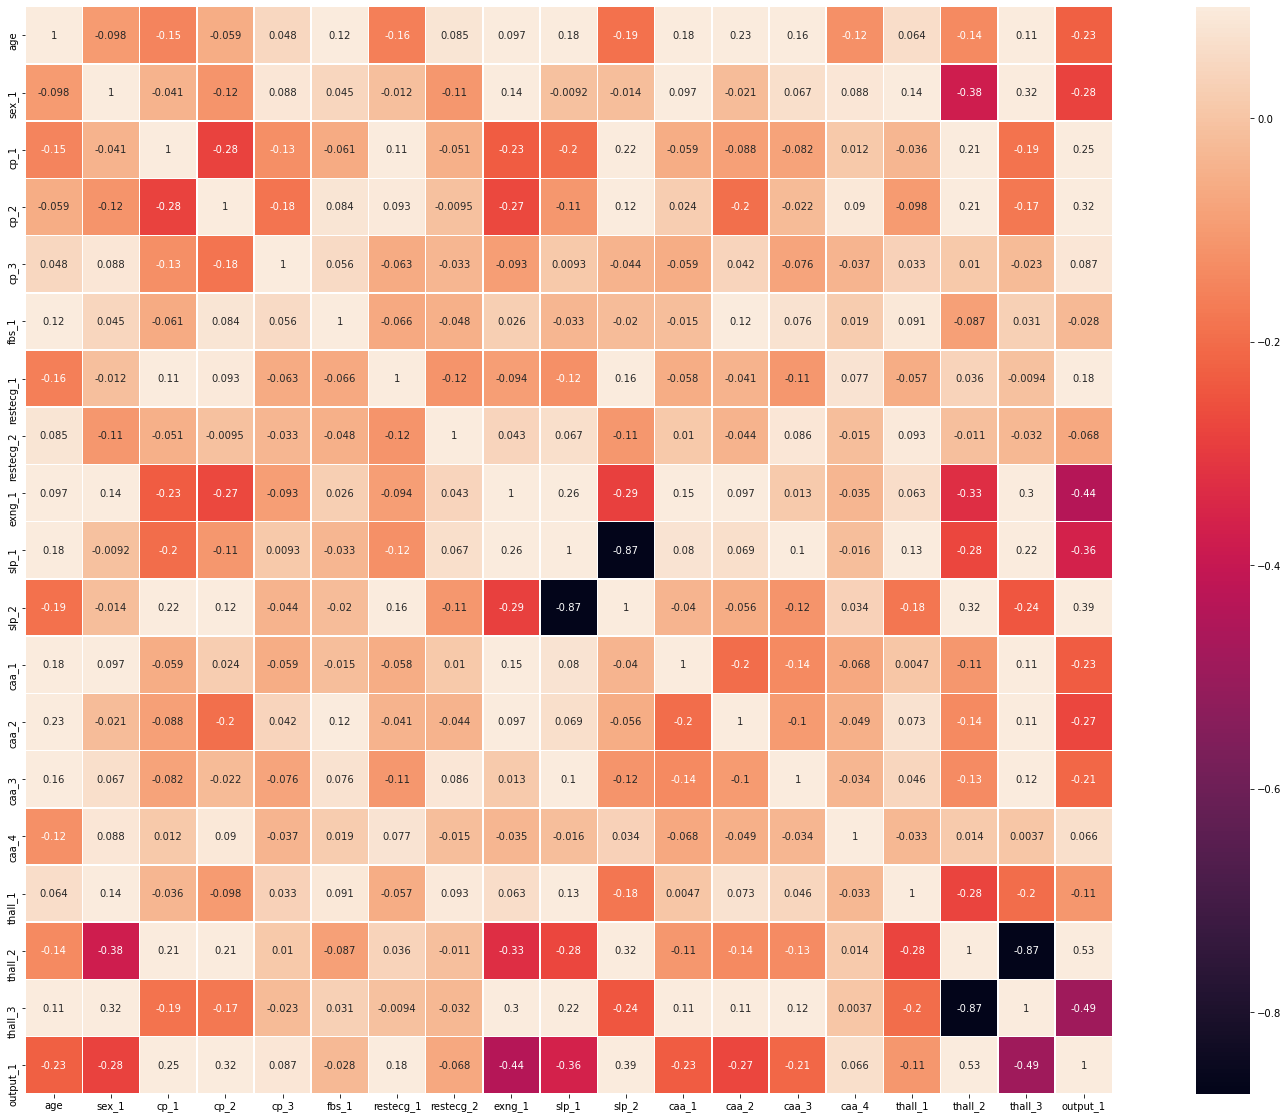

In [16]:
# visual representation of correlations using heatmap
plt.figure(figsize=(30, 20))
features = ['age', 'sex_1', 'cp_1', 'cp_2',
       'cp_3','fbs_1', 'restecg_1', 'restecg_2', 'exng_1', 'slp_1', 'slp_2',
     'caa_1', 'caa_2', 'caa_3', 'caa_4','thall_1', 'thall_2', 'thall_3',
       'output_1']
corr = df_encoded[features].corr()
sns.heatmap(corr, square = True, annot=True, linewidths = 0.5, vmax = 0.1)
plt.savefig('complete_heatmap.png')

In [17]:
C=abs(corr["output_1"]).sort_values(ascending=False)[1:]
print(C)

thall_2      0.527334
thall_3      0.486112
exng_1       0.436757
slp_2        0.394066
slp_1        0.362053
cp_2         0.316742
sex_1        0.280937
caa_2        0.273998
cp_1         0.245879
caa_1        0.232412
age          0.225439
caa_3        0.210615
restecg_1    0.175322
thall_1      0.106589
cp_3         0.086957
restecg_2    0.068410
caa_4        0.066441
fbs_1        0.028046
Name: output_1, dtype: float64


<h2>Machine Learning</h2>

In [18]:
#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#Neural Network Model
from sklearn.neural_network import MLPClassifier


<h3>Data Splitting and scaling</h3>
We will split the data into training and testing sets using train_test_split from sklearn.preprocessing. 
After splitting we will scale our data using the MinMax scaler before using it for training our model.

In [19]:
#Data Splitting
X=df.iloc[:,:13]
Y=df["output"]

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65) 

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)


In [20]:
def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,3))
    plt.scatter(range(len(Y_pred)),Y_pred,color="black",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="pink",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel1',linewidths=1,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

<h3> Model 1: Logistic Regression </h3>

Execution time of model: 0.02294 seconds



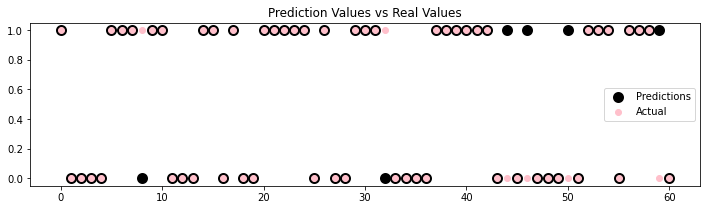

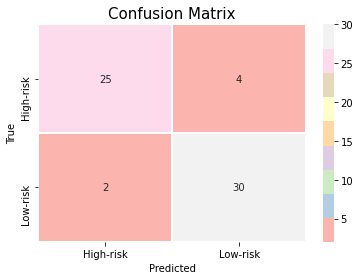

Precision: 0.882 
Recall: 0.938 
F1-Score: 0.909 
Accuracy: 90.164 %
Mean Square Error: 0.098


In [21]:
#Build Model
start = time.time()

model_Log= LogisticRegression(random_state=10)
model_Log.fit(X_train,Y_train)
Y_pred= model_Log.predict(X_test)

end=time.time()

model_Log_time=end-start
model_Log_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_Log_time),5)} seconds\n")
#Plot and compute metrics
compute(Y_pred,Y_test)

<h3> Model 2: KNN (K-nearest Neighbours)</h3>

Execution time of model: 0.01297 seconds


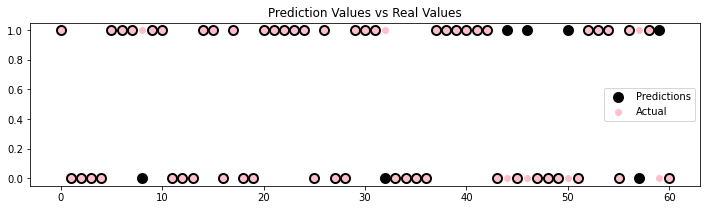

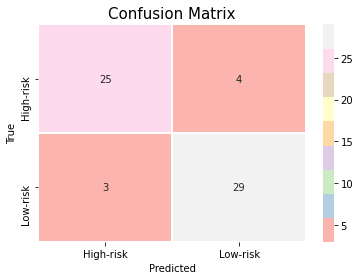

Precision: 0.879 
Recall: 0.906 
F1-Score: 0.892 
Accuracy: 88.525 %
Mean Square Error: 0.115


In [22]:
#Build Model
start=time.time()

model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train,Y_train)
Y_pred = model_KNN.predict(X_test)

end=time.time()

model_KNN_time = end-start
model_KNN_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_KNN_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

<h3>Model 3: Random Forest Classifier</h3>

Execution time of model: 0.46129 seconds


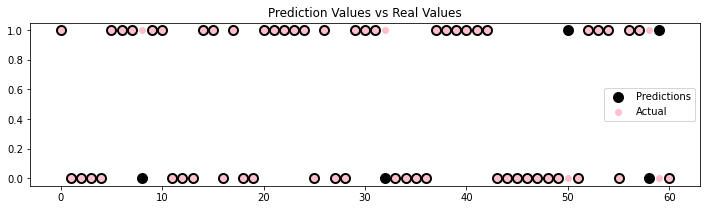

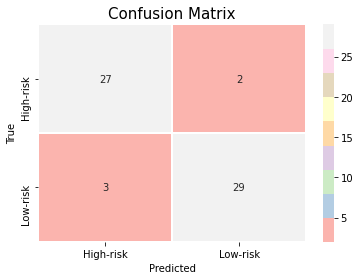

Precision: 0.935 
Recall: 0.906 
F1-Score: 0.921 
Accuracy: 91.803 %
Mean Square Error: 0.082


In [23]:
#Build Model
start=time.time()

model_RF = RandomForestClassifier(n_estimators=300,criterion="gini",random_state=5,max_depth=100)
model_RF.fit(X_train,Y_train)
Y_pred=model_RF.predict(X_test)

end=time.time()

model_RF_time=end-start
model_RF_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_RF_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

<h3> Model 4: Decision Tree Classifier </h3>

Execution time of model: 0.00299 seconds


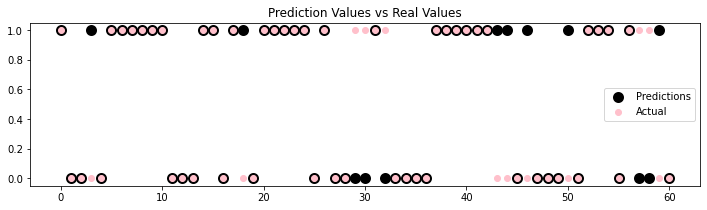

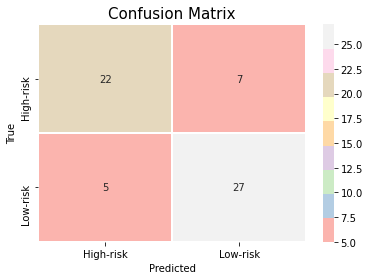

Precision: 0.794 
Recall: 0.844 
F1-Score: 0.818 
Accuracy: 80.328 %
Mean Square Error: 0.197


In [24]:
#Build Model
start=time.time()

model_tree=DecisionTreeClassifier(random_state=10,criterion="gini",max_depth=100)
model_tree.fit(X_train,Y_train)
Y_pred=model_tree.predict(X_test)

end=time.time()

model_tree_time=end-start
model_tree_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_tree_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

<h3>Model 5: Support Vector Machines</h3>

Execution time of model: 0.0369 seconds


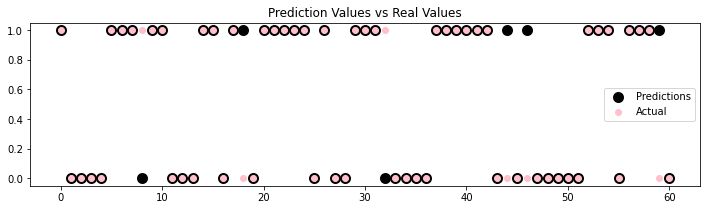

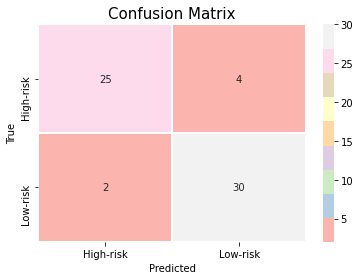

Precision: 0.882 
Recall: 0.938 
F1-Score: 0.909 
Accuracy: 90.164 %
Mean Square Error: 0.098


In [25]:
#Build Model
start=time.time()

model_svm=SVC(kernel="rbf")
model_svm.fit(X_train,Y_train)
Y_pred=model_svm.predict(X_test)

end=time.time()

model_svm_time=end-start
model_svm_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_svm_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

<h3>Model 6: Ada Boost Classifier </h3>

Execution time of model: 0.06087 seconds


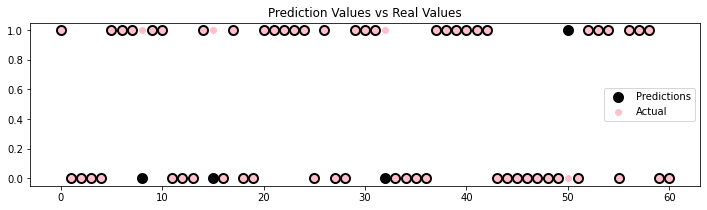

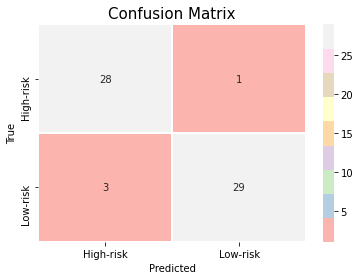

Precision: 0.967 
Recall: 0.906 
F1-Score: 0.935 
Accuracy: 93.443 %
Mean Square Error: 0.066


In [26]:
#Build Model
start=time.time()

model_ADA=AdaBoostClassifier(learning_rate= 0.15,n_estimators= 25)
model_ADA.fit(X_train,Y_train)
Y_pred= model_ADA.predict(X_test)

end=time.time()

model_ADA_time=end-start
model_ADA_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_ADA_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

<h3> Model 7: Gradient Boosting Classifer </h3>

Execution time of model: 0.02796 seconds


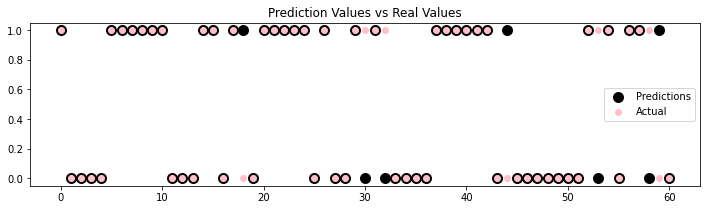

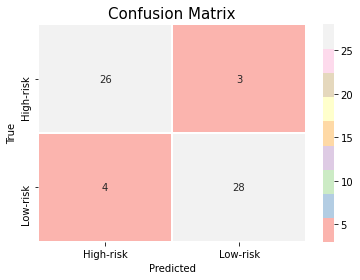

Precision: 0.903 
Recall: 0.875 
F1-Score: 0.889 
Accuracy: 88.525 %
Mean Square Error: 0.115


In [27]:
#Build Model
start=time.time()

model_GB= GradientBoostingClassifier(random_state=10,n_estimators=20,learning_rate=0.29,loss="deviance")
model_GB.fit(X_train,Y_train)
Y_pred= model_GB.predict(X_test)

end=time.time()

model_GB_time=end-start
model_GB_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_GB_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

<h3> Model 8: XGBoost Classifier </h3>

C:\Users\SoumyaKrishnamurthy\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:24:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Execution time of model: 0.05186 seconds


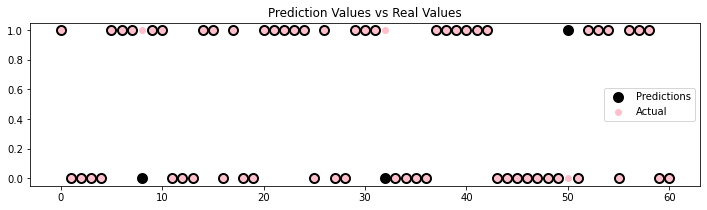

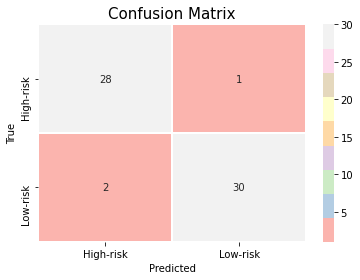

Precision: 0.968 
Recall: 0.938 
F1-Score: 0.952 
Accuracy: 95.082 %
Mean Square Error: 0.049


In [29]:
from xgboost import XGBClassifier
#Build Model
start=time.time()

model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,
                          max_depth=1,
                          n_estimators = 50,
                          colsample_bytree = 0.5)
model_xgb.fit(X_train,Y_train)
Y_pred = model_xgb.predict(X_test)

end=time.time()

model_xgb_time=end-start
model_xgb_accuracy=round(accuracy_score(Y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_xgb_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,Y_test)

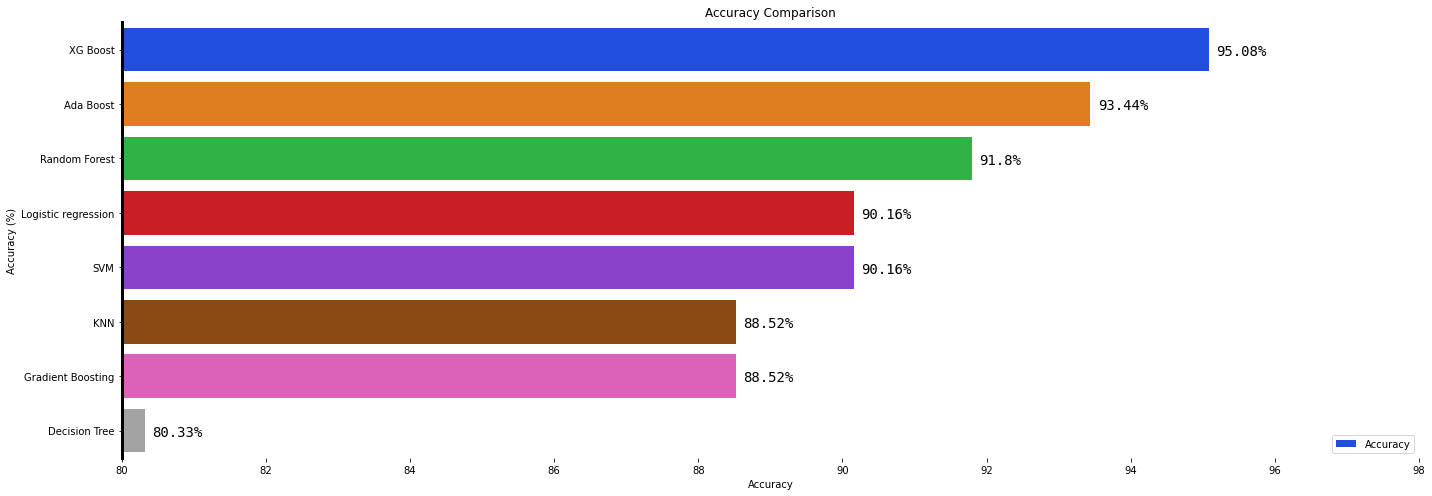

In [41]:
#Plot accuracies
accuracies={"Logistic regression": model_Log_accuracy,
            "KNN": model_KNN_accuracy,
            "SVM": model_svm_accuracy,
            "Decision Tree": model_tree_accuracy,
            "Random Forest": model_RF_accuracy,
            "Ada Boost": model_ADA_accuracy,
            "Gradient Boosting": model_GB_accuracy,
            "XG Boost": model_xgb_accuracy}

acc_list=accuracies.items()
k,v = zip(*acc_list) 
temp=pd.DataFrame(index=k,data=v,columns=["Accuracy"])
temp.sort_values(by=["Accuracy"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ACC=sns.barplot(y=temp.index,x=temp["Accuracy"],label="Accuracy",linewidth=3,orient="h",palette="bright")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison")
plt.xlim(80,98)

ACC.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ACC.spines[w].set_visible(False)
    
#Write text on barplots
k=0
for ACC in ACC.patches:
    width = ACC.get_width()
    plt.text(width+0.1, (ACC.get_y() + ACC.get_height()-0.3),s="{}%".format(temp["Accuracy"][k]),fontname = 'monospace', fontsize = 14, color = 'black') 
    k+=1
    
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

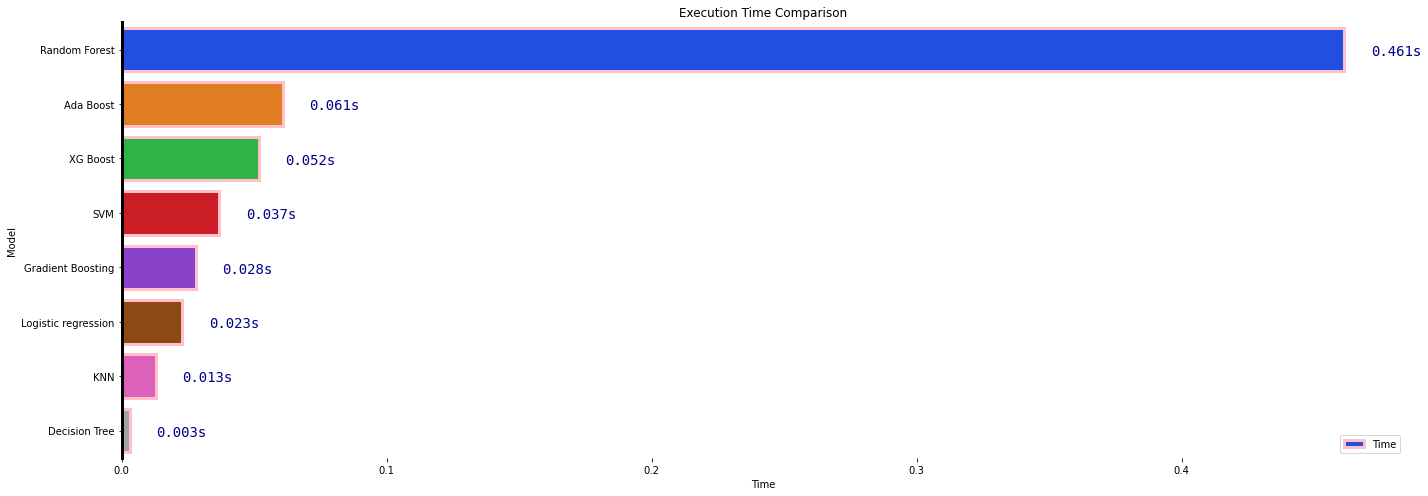

In [43]:
exe_time={"Logistic regression": model_Log_time,
            "KNN": model_KNN_time,
            "SVM": model_svm_time,
            "Decision Tree": model_tree_time,
            "Random Forest": model_RF_time,
            "Ada Boost": model_ADA_time,
            "Gradient Boosting": model_GB_time,
            "XG Boost": model_xgb_time }

time_list=exe_time.items()
k,v = zip(*time_list) 
temp1=pd.DataFrame(index=k,data=v,columns=["Time"])
temp1.sort_values(by=["Time"],ascending=False,inplace=True)

#Plot accuracy for different models
plt.figure(figsize=(20,7))
ET=sns.barplot(y=temp1.index,x=temp1["Time"],label="Time",edgecolor="pink",linewidth=3,orient="h",palette="bright")
plt.ylabel("Model")
plt.title("Execution Time Comparison")
ET.spines['left'].set_linewidth(3)
for w in ['right', 'top', 'bottom']:
    ET.spines[w].set_visible(False)

#Write text on barplots
k=0
for ET in ET.patches:
    width = ET.get_width()
    plt.text(width+0.01, (ET.get_y() + ET.get_height()-0.3),s="{}s".format(round((temp1["Time"][k]),3)),fontname = 'monospace', fontsize = 14, color = 'darkblue') 
    k+=1

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [38]:
Pred = pd.DataFrame()
Pred['y_test'] = Y_test
Pred['y_pred'] = Y_pred
Pred['y_pred'] = Pred['y_pred'].astype(int)

Pred.to_csv('pred_output.csv')
Pred

y_test  y_pred
2         1       1
240       0       0
237       0       0
224       0       0
227       0       0
..      ...     ...
149       1       1
66        1       1
34        1       1
273       0       0
202       0       0

[61 rows x 2 columns]